In [1]:
from plot_histogram import *
from plot_data_error_vs_scale import plot_data_error_vs_scale
from relative_error import relative_error
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import copy as cp
import pickle

In [2]:
dir_list = np.loadtxt("directory_list.txt", dtype = "str")
for i in range(1, len(dir_list)):
    print("{}. {}".format(i, dir_list[i]))

1. 2in_7out/x_10layers_100neurons_BatchNorm_MSE_RE_1e-3lr_200epoch_Standardization_After_acc_1/


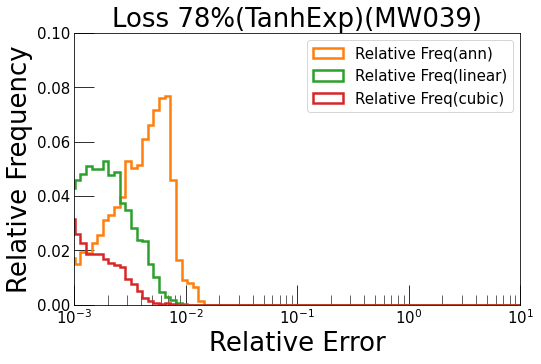

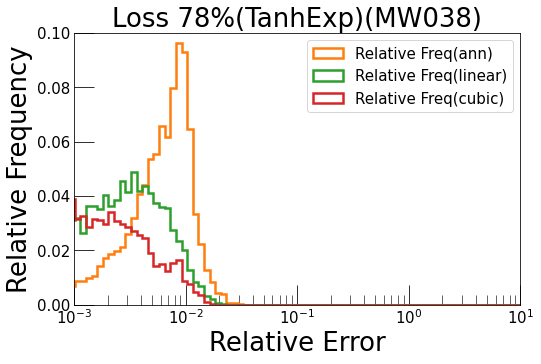

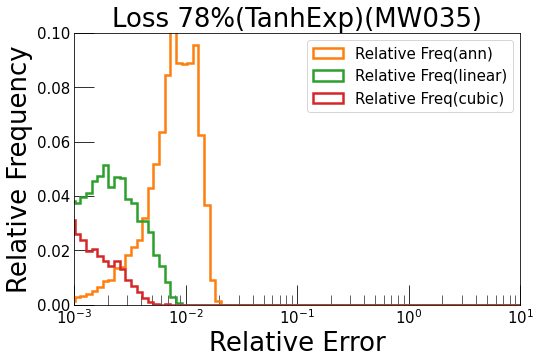

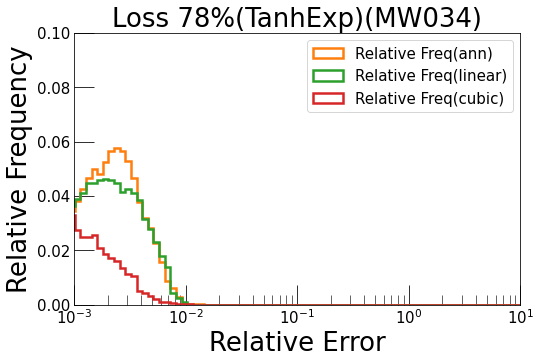

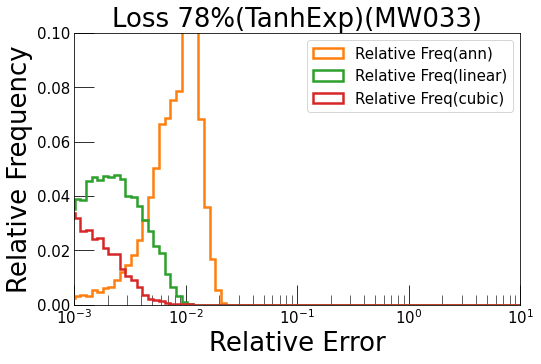

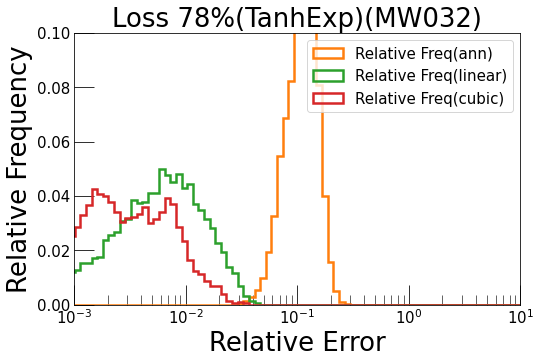

In [4]:
##Plot relative error of Machine-Learning-Model(ANN), Linear, Cubic spline as histogram.
plot_dir = {"Loss 78%(TanhExp)":1}  ##This dictionary is specified graph's title as a key and index of the dir_list.
for title, dir_i in plot_dir.items():
    save_dir = dir_list[dir_i]
    with open(save_dir + "interp.pickle", mode = "rb") as f:
        interp = pickle.load(f)
    plot_histogram_comp_methods(title, is_normed = False, interp = interp)

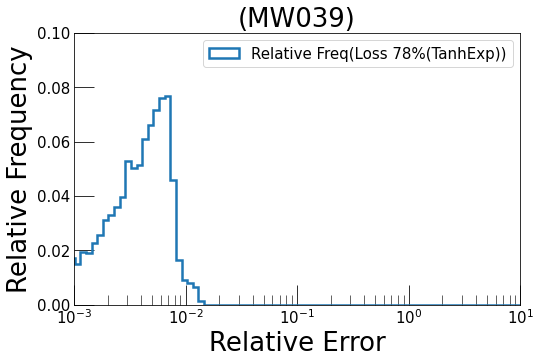

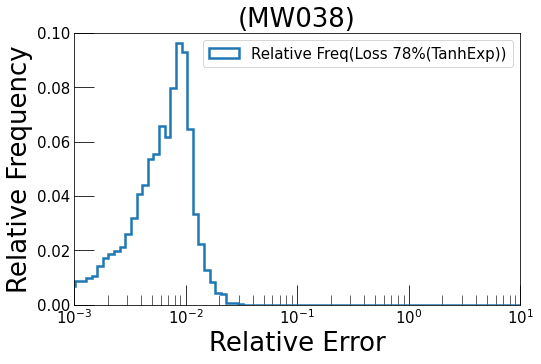

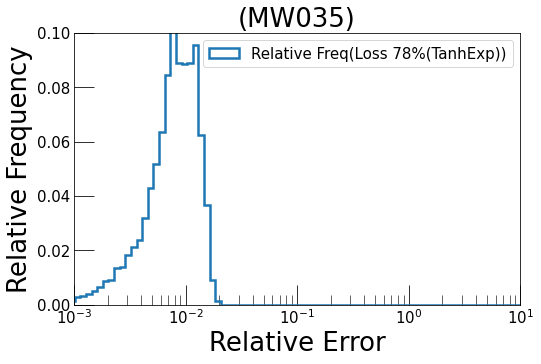

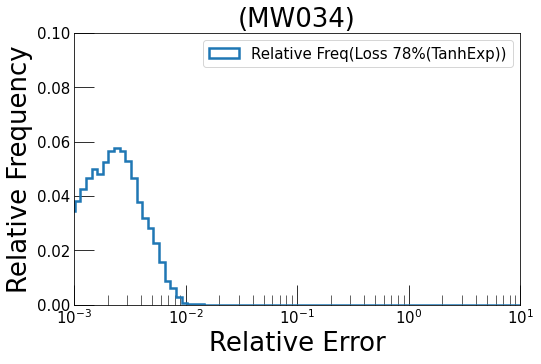

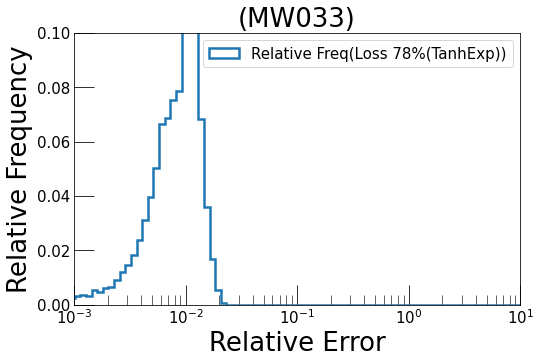

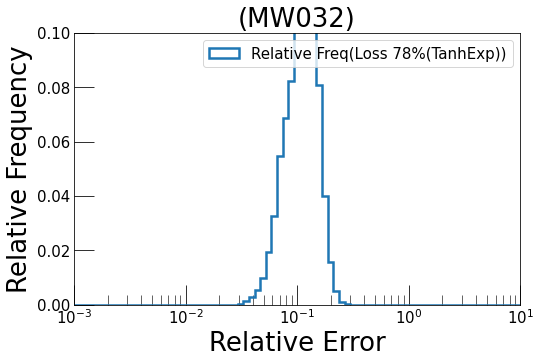

In [6]:
##Plot relative error of Machine-Learning-Model(ANN) in each directories as histogram.
plot_dir = {"Loss 78%(TanhExp)":1}
interp = {}
for caption, dir_i in plot_dir.items():
    with open(dir_list[dir_i] + "interp.pickle", mode = "rb") as f:
        interp[caption] = pickle.load(f)
plot_histogram_machine_learning_models(is_normed = False, interp = interp)

In [7]:
dir_i = 1
param_kind = "x"
superior_data_num = 10
superior_ratio = 10
is_plot_all = False
comp_method_list = ["linear", "cubic"]
save_dir = dir_list[dir_i]
print("Directory is a {}".format(save_dir))
with open(save_dir + "interp.pickle", mode = "rb") as f:
    interp = pickle.load(f)
with open(save_dir + "scale_factor.pickle", mode = "rb") as f:
    scale_factor = pickle.load(f)

m_list = list(interp["origin"].keys())
plot_i = {}
for m_key in m_list:
    plot_i[m_key] = {}
    print("--{}--".format(m_key))
    for method in comp_method_list:
        plot_i[m_key][method] = []
        for i, data_method in enumerate(interp[method][m_key]):
            data_origin, data_ann = interp["origin"][m_key][i], interp["ann"][m_key][i]
            mask = (data_origin != data_ann)
            if not np.all(mask == False):
                data_origin, data_ann, data_method = data_origin[mask], data_ann[mask], data_method[mask]
                error_ann = relative_error(data_origin, data_ann)
                error_method = relative_error(data_origin, data_method)
                error_ratio = error_method / error_ann
                if np.count_nonzero(error_ratio >= superior_ratio) >= superior_data_num:
                    plot_i[m_key][method].append(i)
        print("{} : {}".format(method, len(plot_i[m_key][method])))

plot_i_set = {}
for m_key in m_list:
    plot_i_set[m_key] = []
    for method in comp_method_list:
        plot_i_set[m_key] += plot_i[m_key][method]
    plot_i_set[m_key] = list(sorted(plot_i_set[m_key]))

if is_plot_all:
    for m_key in m_list:
        print("--{}--".format(m_key[11:16]))
        if len(plot_i_set[m_key]) != 0:
            for i in plot_i_set[m_key]:
                plot_data_error_vs_scale(interp["origin"][m_key][i], interp["ann"][m_key][i], interp["linear"][m_key][i], interp["cubic"][m_key][i], scale_factor[m_key][i], param_kind, superior_ratio)
else:
    is_plot = True
    while(is_plot):
        print("1. Plot graph.")
        print("2. Exit.")
        menu = int(input(">> "))
        if menu == 1:
            for i, m_key in enumerate(m_list):
                print("{}. {}".format(i, m_key[11:16]))
            menu = int(input(">> "))
            m_key = m_list[menu]
            if len(plot_i_set[m_key]) == 0:
                print("This key does not have any data.")
            else:
                print("Select {}~{}.".format(0, len(plot_i_set[m_key]) - 1))
                i = int(input(">> "))
                i = plot_i_set[m_key][i]
                plot_data_error_vs_scale(interp["origin"][m_key][i], interp["ann"][m_key][i], interp["linear"][m_key][i], interp["cubic"][m_key][i], scale_factor[m_key][i], param_kind, superior_ratio)
        elif menu == 2:
            is_plot = False
        else:
            pass

Directory is a 2in_7out/x_10layers_100neurons_BatchNorm_MSE_RE_1e-3lr_200epoch_Standardization_After_acc_1/
--mainbranch_MW039.csv--
linear : 0
cubic : 0
--mainbranch_MW038.csv--
linear : 0
cubic : 0
--mainbranch_MW035.csv--
linear : 0
cubic : 0
--mainbranch_MW034.csv--
linear : 0
cubic : 0
--mainbranch_MW033.csv--
linear : 0
cubic : 0
--mainbranch_MW032.csv--
linear : 0
cubic : 0
1. Plot graph.
2. Exit.
>> 1
0. MW039
1. MW038
2. MW035
3. MW034
4. MW033
5. MW032
>> 1
This key does not have any data.
1. Plot graph.
2. Exit.
>> 2
